In [1]:
from lightkurve import search_targetpixelfile
from lightkurve import TessTargetPixelFile
import lightkurve as lk
import numpy as np

# Let's look at a star we know has a planet
*If we can spot a blob periodically transiting between the star and us, chances are it's an exoplanet*


<AxesSubplot:title={'center':'Target ID: 6922244, Cadence: 11958'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

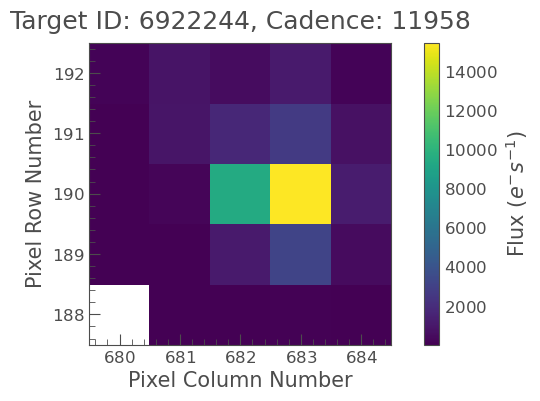

In [2]:
# Download the pixelfile for a given star
# A quarter means a quarter of a year
pixelFile = search_targetpixelfile('KIC 6922244', author="Kepler", cadence="long", quarter=4).download()
# Show a single snapshot
pixelFile.plot(frame=42)


3.522652265226523 d
353.60132485035285
0.1 d


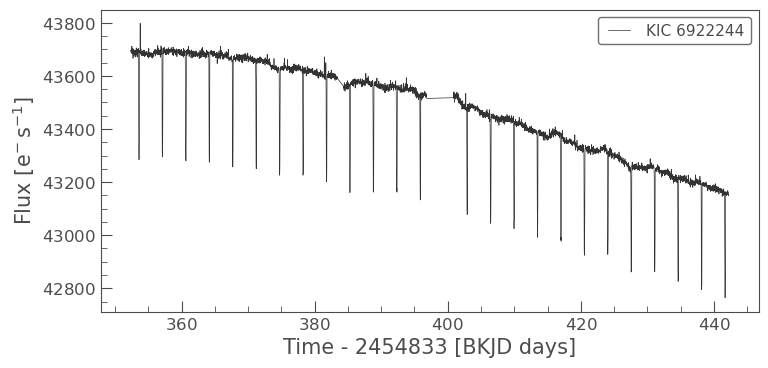

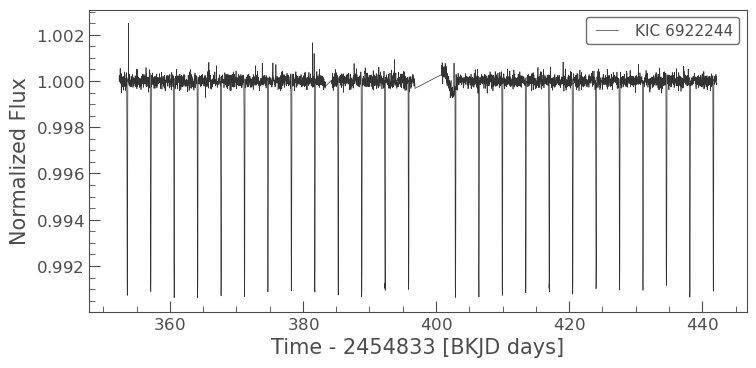

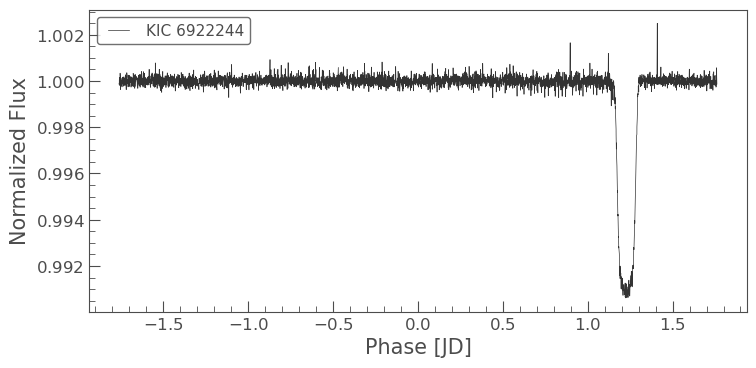

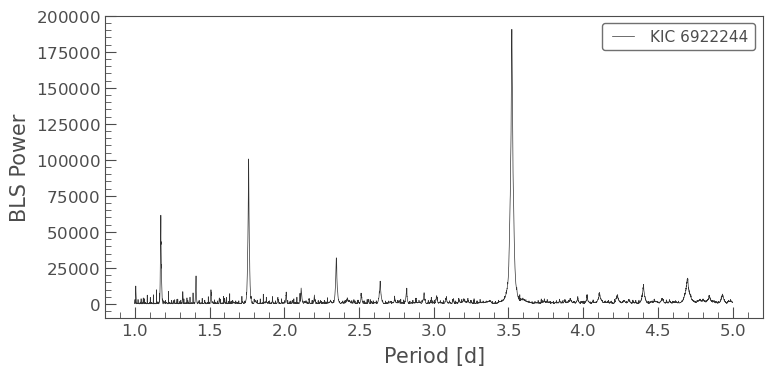

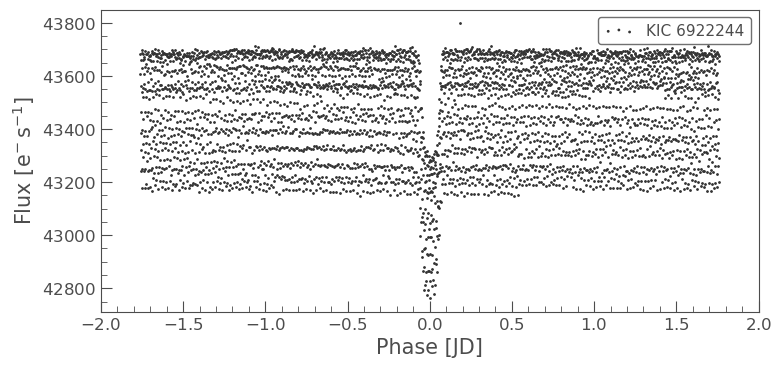

In [3]:
# We'll combine the individual frames into a lightcurve
# Aperture masks make the image look better for analysis
lc = pixelFile.to_lightcurve(aperture_mask=pixelFile.pipeline_mask)
lc.plot()

# We may find it easier to spot the pattern if we flatten the curve
flat_lc = lc.flatten()
flat_lc.plot()

# Phase-fold the light curve to verify that the period and transit time
# correspond to the transit signal
# This puts the frequency spikes on top of each other if we get the period right
folded_lc = flat_lc.fold(period=3.5225)
folded_lc.plot()

# How to discover the correct period?
# Use a periodogram to show all the repetitive patterns in your graph
# Gives you the most likely candidate

# Periodograms are an estimate of the spectral density of a signal
# (An estimation of what the Fourier Transform of the data would look like
#  if it were a continuous function https://arxiv.org/pdf/1703.09824.pdf)

period = np.linspace(1, 5, 10000)
# BLS = Box Least Squares
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot()

# Period value corresponding to the highest peak in the periodogram
planet_x_period = bls.period_at_max_power

planet_x_t0 = bls.transit_time_at_max_power
planet_x_dur = bls.duration_at_max_power

# Folding can yield a lot of information about the planet
# The depth can tell you about the size, etc
ax = lc.fold(period=planet_x_period, epoch_time=planet_x_t0).scatter()
ax.set_xlim(-2,2)

print(planet_x_period)
print(planet_x_t0)
print(planet_x_dur)


__HOW TO FIND A PLANET__

Pick a star and try to see if there's something transiting in front of it

In [5]:
# Use TESS data. That's being updated regularly. Kepler is already well analysed

# Downloading MAST data
# https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html

# Look for nearby stars
# MAST catalogs -> TESS CTL v8.01 -> Advanced Search
# Has 9.5 million records

# Narrow down the search as you like

# For example:
# T_eff = Temperature between 2000 and 3500
#         These are red dwarfs and tend to have rapidly orbiting planets
#         Which fits the 24 day time sampling rate of TESS

# Distance = Between 12 and 24 parsecs
#            Because we are not able to do the Kessel run in less than 12

# Take the ID, e.g. 140206488

# Double-check in EXOMAST to see if a planet has already been found

# Put the name in MAST search and find TESS data
# We can try to access this with search_targetpixelfile
# OR download the data to a local folder

In [7]:
pip install tess

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 427.2 kB/s eta 0:00:00 kB/s eta 0:00:01:01
  Preparing metadata (setup.py) ... done
  Created wheel for tess: filename=tess-0.3.1-cp310-cp310-linux_x86_64.whl size=791940 sha256=df317b4719a664dcc4d444829e1eb1816ab27e59a2f54b89e4e9eda6a2da9834
  Stored in directory: /home/ujjwal/.cache/pip/wheels/81/ca/22/556b9382a07036808dd7a9aa0dd480e842ff8eb0c94995fd48
Successfully built tess

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Let's download the pixelfile for a given star
# And save it to a local folder (See download helper below)

# Command to search for file - often is not available, so that's why we download more manually
# pixelFile = search_targetpixelfile('KIC 6922244', author="TESS", cadence="long", quarter=4).download()
import tess

# Load the TESS target pixel file
tpf = tess.TessTargetPixelFile("")

# Plot a single snapshot
tpf.plot(frame=42)

# Plot the lightcurve
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
lc.plot()

# Flatten it
flat_lc = lc.flatten()
flat_lc.plot()
IN

# Try and find the period of the most prominent orbiting object
period = np.linspace(1, 5, 10000)
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot()

planet_x_period = bls.period_at_max_power
planet_x_t0 = bls.transit_time_at_max_power
planet_x_dur = bls.duration_at_max_power

# Phase-fold the ligthcurve based on the discovered period at max power
ax = lc.fold(period=planet_x_period, epoch_time=planet_x_t0).scatter()
ax.set_xlim(-3,3)

AttributeError: module 'tess' has no attribute 'TessTargetPixelFile'

In [ ]:
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

def download_and_unzip(url, extract_to='.'):
    http_response = urlopen(url)
    zipfile = ZipFile(BytesIO(http_response.read()))
    zipfile.extractall(path=extract_to)

product_group_id = '65432596'
url = '' + product_group_id
destination = '//'

download_and_unzip(url, destination)
